Loading and Converting to HSV:

The image is loaded and converted into the HSV color space, which splits the image into three channels: hue, saturation, and value.
Thresholding:

We threshold the value plane to generate a binary mask, which helps separate the foreground from the background. The foreground is where pixel values are greater than a certain threshold.
Bitwise Operations:

The cv2.bitwise_and() function is used to isolate the foreground by applying the mask to the value channel.
Histogram Equalization:

The histogram of the foreground is computed, and its cumulative distribution function (CDF) is calculated using np.cumsum(). The equalization formula is then applied to map the pixel intensities in the foreground to a more uniform distribution.
Combining Foreground and Background:

The equalized foreground is combined with the background using cv2.add() to generate the final output.
Displaying the Results:

The hue, saturation, value planes, the mask, and the final image with equalized foreground are displayed for comparison.

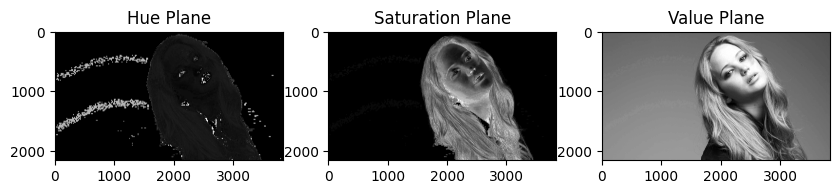

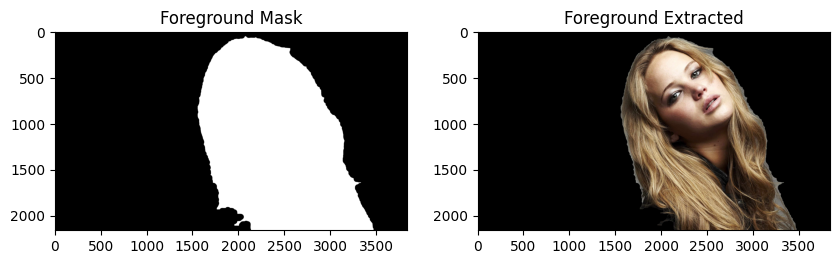

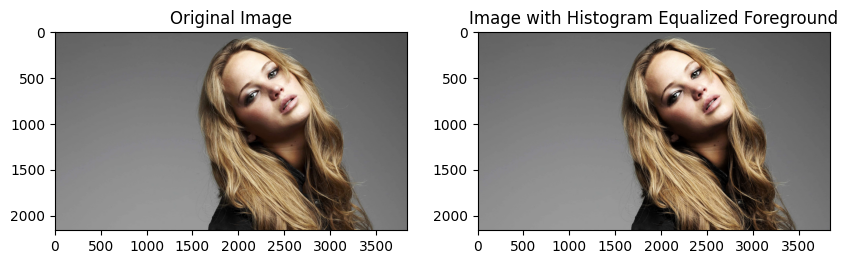

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step (a): Load the image and convert to HSV
image = cv2.imread('utils/jeniffer.jpg')  # Load your image here
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV channels
hue, saturation, value = cv2.split(hsv_image)

# Display the H, S, V planes in grayscale
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.show()

# Step (b): Threshold the 'Value' plane to create a binary mask for foreground
_, mask = cv2.threshold(saturation, 15, 255, cv2.THRESH_BINARY)

binary_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (65, 65)))

# Step (c): Extract the foreground using cv2.bitwise_and
foreground = cv2.bitwise_and(image, image, mask=binary_mask)

# Display the mask and foreground
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(binary_mask, cmap='gray')
plt.title('Foreground Mask')
plt.subplot(122)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Foreground Extracted')
plt.show()

# Step (d): Compute the histogram of the foreground
#hist, bins = np.histogram(foreground.flatten(), 256, [0, 256])

# Step (e): Compute the cumulative sum (CDF) of the histogram
#cdf = hist.cumsum()

# Normalize the CDF
#cdf_normalized = cdf * hist.max() / cdf.max()

# Mask zero values to avoid dividing by zero
#cdf_m = np.ma.masked_equal(cdf, 0)
#cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Histogram equalization formula
#cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill with 0s

# Apply the CDF to the foreground to equalize it
#equalized_foreground = cdf[foreground]

# Step (f): Combine the histogram-equalized foreground with the original background
#background = cv2.bitwise_and(value, value, mask=cv2.bitwise_not(mask))
#final_value_plane = cv2.add(background, equalized_foreground)

# Merge the channels back to form the final image
#final_hsv_image = cv2.merge([hue, saturation, final_value_plane])
#final_image = cv2.cvtColor(final_hsv_image, cv2.COLOR_HSV2BGR)

hsv_foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2HSV)
value_foreground = hsv_foreground[:,:,2]
value_foreground_equalized = cv2.equalizeHist(value_foreground)
hsv_foreground[:,:,2] = value_foreground_equalized

equalized_image = cv2.cvtColor(hsv_foreground, cv2.COLOR_HSV2BGR)
output_image = image.copy()
output_image[binary_mask == 255] = equalized_image[binary_mask == 255]

# Show the original and final images
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Histogram Equalized Foreground')
plt.show()

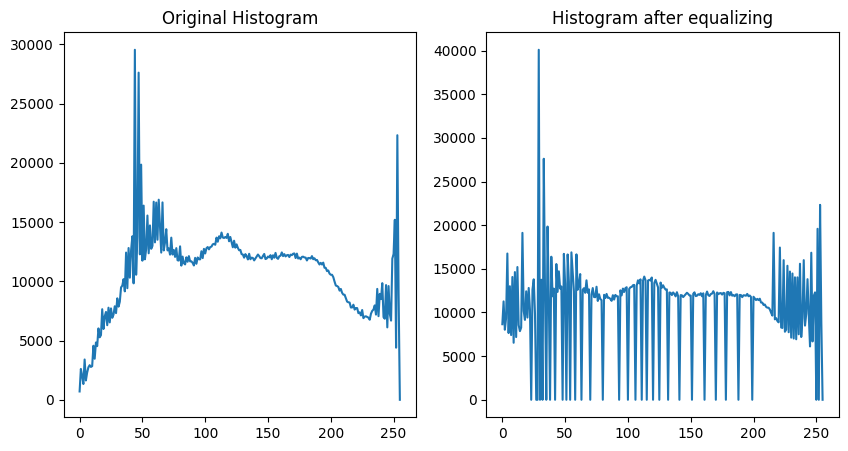

In [5]:
original_foreground = cv2.bitwise_and(value, value, mask=binary_mask)
original_hist = cv2.calcHist([original_foreground], [0], None, [256], [1, 256]).flatten()
equalized_hist = cv2.calcHist([value_foreground_equalized], [0], None, [256], [1, 256]).flatten()
cumulative_original = np.cumsum(original_hist)
cumulative_equalized = np.cumsum(equalized_hist)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(original_hist)
axes[0].set_title('Original Histogram')
axes[1].plot(equalized_hist)
axes[1].set_title('Histogram after equalizing')
plt.show()